# Fetching Data from CryptoCompare webpage for Historical Day Social Stats Data for the 10 currencies

Returns daily social stats data for the coin requested

Data retrieved using the API key...Column names and description

 Time epoch timestamp
The Unix timestamp for the day.
 Comments int
The total number of posts/replies on the coin’s page.
 posts int
The number of posts on this coins page.
 followers int
The number of users following this coin.
 points int
Total points scored for this coin that day. Points are awarded for different metrics on each social media platform.
 overview_page_views int
Numbers of views for the ‘Overview’ tab on this coin’s CryptoCompare page that day.
 analysis_page_views int
Number of views for the ‘Analysis’ tab on this coin’s CryptoCompare page that day.
 markets_page_views int
Numbers of views for the ‘Markets’ tab on this coin’s CryptoCompare page that day.
 charts_page_views int
Number of views for the ‘Charts’ tab on this coin’s CryptoCompare page that day.
 trades_page_views int
Number of views for the ‘Trades’ tab on this coin’s CryptoCompare page that day.
 forum_page_views int
Number of views for the ‘Forum’ tab on this coin’s CryptoCompare page that day.
 influence_page_views int
Number of views for the ‘Influence’ tab on this coin’s CryptoCompare page.
 total_page_views int
Total Number of page views for any tab on this coin’s Cryptocompare page.
 fb_likes int
The number of users who had ‘Liked’ this page on Facebook as of that day.
 fb_talking_about int
The number of Facebook users ‘Talking About’ this coin (as determined by Facebook) that day.
 twitter_followers int
The number of followers for the requested coin’s Twitter account as of that day.
 twitter_lists int
The number of Twitter lists the request coin featured in as of that day.
 twitter_favourites int
The number of times this coin’s page had been favourited as of that day.
 twitter_statuses int
The number of tweets posted by the requested coin’s Twitter account as of that day.
 reddit_subscribers int
The number of reddit users that subscribed to this coin’s sub-reddit as of that day.
 reddit_active_users int
The number of ‘active users’ (as determined by Reddit) in this coin’s sub-reddit that day.
 reddit_posts_per_hour float
The average number of posts per hour in this coin’s sub-reddit as of that day.
 reddit_posts_per_day float
The average number of posts per day in this coin’s sub-reddit as of that day.
 reddit_comments_per_hour float
The average number of comments per hour in this coin’s sub-reddit as of that day.
 reddit_comments_per_day float
The number of times this repository had been starred as of that day.
 code_repo_stars int
The number of times this repository had been starred as of that day.
 code_repo_forks int
The number of forks splitting off from this repository as of that day.
 code_repo_subscribers int
The number of users subscribed to this repository as of that day.
 code_repo_open_pull_requests int
Number of issues with a pull request waiting on approval as of that day.
 code_repo_closed_pull_issues int
Number of issues with a pull request that have been closed as of that day.
 code_repo_open_issues int
Total number of open issues as of that day.
 code_repo_closed_issues int
Total number of issues closed as of that day.
 code_repo_contributors int
Total number of users who have contributed to this repo as of that day.


In [23]:
# import libraries
import requests
from requests import Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
from cryptocompare_config import API_Key
import numpy as np
import pymongo
from pymongo import MongoClient
import certifi
from mongo2_config import mongo_uri
import datetime
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
# %matplotlib notebook

In [2]:
# api_endpoint = 'https://min-api.cryptocompare.com/data/v2/news/?lang=EN&api_key='
# api_endpoint += API_Key

In [3]:
# data_retrieved = requests.get(api_endpoint).json()
# data_retrieved

In [4]:
symbols=['BTC','ETH','XRP','USDT','ADA','XMR','XLM','BUSD','LTC','DOGE']
symbols={'BTH':'928962','BTC':'1182','ETH':'7605', 'XRP': '5031', 'USDT': '171986', 'ADA': '321992','XMR': '5038', 'XLM': '4614', 'BUSD' : '930595', 'LTC' : '3808', 'DOGE': '4432'}
Top_stats_df = pd.DataFrame()
for symbol,coin_id in symbols.items():
    url = 'https://min-api.cryptocompare.com/data/social/coin/histo/day?coinId='
    url = url + coin_id
    params = '&aggregate=2&limit=2000&toTs=1643261780'
    url = url + params
    url = url + '&api_key='+ API_Key    
    data_retrieved = requests.get(url).json()
    data_retrieved_json = data_retrieved['Data']
    stats_df = pd.json_normalize(data_retrieved_json)
    stats_df["Coin_Symbol"] = symbol
    stats_df["Rev_time"] = pd.to_datetime(stats_df['time'],unit='s')
    Top_stats_df = Top_stats_df.append(stats_df, ignore_index = True)

Top_stats_df

,comments,posts,followers,points,overview_page_views,analysis_page_views,markets_page_views,charts_page_views,trades_page_views,forum_page_views,...,code_repo_forks,code_repo_subscribers,code_repo_open_pull_issues,code_repo_closed_pull_issues,code_repo_open_issues,code_repo_closed_issues,code_repo_contributors,time,Coin_Symbol,Rev_time
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1470355200,BTH,2016-08-05
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1470528000,BTH,2016-08-07
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1470700800,BTH,2016-08-09
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1470873600,BTH,2016-08-11
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1471046400,BTH,2016-08-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11006,6504,4358,18291,631315,2118043,30987,72058,208922,67071,283150,...,2290,861,65,1390,94,902,593,1642464000,DOGE,2022-01-18
11007,6504,4358,18303,631615,2118715,30996,72072,208965,67087,283191,...,2290,861,65,1390,94,902,593,1642636800,DOGE,2022-01-20
11008,6505,4359,18306,631725,2119577,31006,72083,209027,67104,283255,...,2290,861,65,1390,94,902,593,1642809600,DOGE,2022-01-22
11009,6505,4359,18312,631875,2120388,31020,72098,209091,67152,283311,...,2290,861,65,1390,94,902,593,1642982400,DOGE,2022-01-24


In [5]:
# Replace NaN as '0'
Top_stats_df.isnull().sum().sum()
Top_stats_df.isna().sum()

comments                        0
posts                           0
followers                       0
points                          0
overview_page_views             0
analysis_page_views             0
markets_page_views              0
charts_page_views               0
trades_page_views               0
forum_page_views                0
influence_page_views            0
total_page_views                0
fb_likes                        0
fb_talking_about                0
twitter_followers               0
twitter_following               0
twitter_lists                   0
twitter_favourites              0
twitter_statuses                0
reddit_subscribers              0
reddit_active_users             0
reddit_posts_per_hour           0
reddit_posts_per_day            0
reddit_comments_per_hour        0
reddit_comments_per_day         0
code_repo_stars                 0
code_repo_forks                 0
code_repo_subscribers           0
code_repo_open_pull_issues      0
code_repo_clos

In [6]:
# change column names
Top_stats_df= Top_stats_df.rename(columns={   
    
    'followers': 'Cryptocompare_followers', 
    'total_page_views': 'Cryptocompare_total_page_views', 
    'fb_talking_about': 'Fb_followers',
    'twitter_followers' : 'Twitter_followers',
    'reddit_subscribers': 'Reddit_subscribers',
    'code_repo_subscribers': 'Code_Repo_Subscribers',
    'Rev_time': 'Datetime'})
                                
Top_stats_df

,comments,posts,Cryptocompare_followers,points,overview_page_views,analysis_page_views,markets_page_views,charts_page_views,trades_page_views,forum_page_views,...,code_repo_forks,Code_Repo_Subscribers,code_repo_open_pull_issues,code_repo_closed_pull_issues,code_repo_open_issues,code_repo_closed_issues,code_repo_contributors,time,Coin_Symbol,Datetime
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1470355200,BTH,2016-08-05
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1470528000,BTH,2016-08-07
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1470700800,BTH,2016-08-09
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1470873600,BTH,2016-08-11
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1471046400,BTH,2016-08-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11006,6504,4358,18291,631315,2118043,30987,72058,208922,67071,283150,...,2290,861,65,1390,94,902,593,1642464000,DOGE,2022-01-18
11007,6504,4358,18303,631615,2118715,30996,72072,208965,67087,283191,...,2290,861,65,1390,94,902,593,1642636800,DOGE,2022-01-20
11008,6505,4359,18306,631725,2119577,31006,72083,209027,67104,283255,...,2290,861,65,1390,94,902,593,1642809600,DOGE,2022-01-22
11009,6505,4359,18312,631875,2120388,31020,72098,209091,67152,283311,...,2290,861,65,1390,94,902,593,1642982400,DOGE,2022-01-24


In [7]:
Top_stats_df.dtypes

comments                                   int64
posts                                      int64
Cryptocompare_followers                    int64
points                                     int64
overview_page_views                        int64
analysis_page_views                        int64
markets_page_views                         int64
charts_page_views                          int64
trades_page_views                          int64
forum_page_views                           int64
influence_page_views                       int64
Cryptocompare_total_page_views             int64
fb_likes                                   int64
Fb_followers                               int64
Twitter_followers                          int64
twitter_following                          int64
twitter_lists                              int64
twitter_favourites                         int64
twitter_statuses                           int64
Reddit_subscribers                         int64
reddit_active_users 

In [8]:
#creating new df for only the number of followers from Top_news_df
Followers_df = Top_stats_df[['Coin_Symbol','Datetime','Cryptocompare_followers', 'Fb_followers', 'Twitter_followers', 'Reddit_subscribers', 'Code_Repo_Subscribers']]

Followers_df    

,Coin_Symbol,Datetime,Cryptocompare_followers,Fb_followers,Twitter_followers,Reddit_subscribers,Code_Repo_Subscribers
0,BTH,2016-08-05,0,0,0,0,0
1,BTH,2016-08-07,0,0,0,0,0
2,BTH,2016-08-09,0,0,0,0,0
3,BTH,2016-08-11,0,0,0,0,0
4,BTH,2016-08-13,0,0,0,0,0
...,...,...,...,...,...,...,...
11006,DOGE,2022-01-18,18291,63,2887256,2260882,861
11007,DOGE,2022-01-20,18303,63,2902233,2261906,861
11008,DOGE,2022-01-22,18306,63,2912560,2262813,861
11009,DOGE,2022-01-24,18312,63,2922496,2263703,861


In [9]:
# adding a new column with total number of followers and subscribers
# Top_stats_df.insert(6, "Total_Follower_Subscriber", sum, True)

col_list = list(Followers_df)
print(col_list)

Total_Followers_Subscribers = Followers_df[col_list].sum(axis=1)
Followers_df["Total_Followers_Subscribers"] = Total_Followers_Subscribers
Followers_df

['Coin_Symbol', 'Datetime', 'Cryptocompare_followers', 'Fb_followers', 'Twitter_followers', 'Reddit_subscribers', 'Code_Repo_Subscribers']


C:\Users\lavin\AppData\Local\Temp/ipykernel_10216/2330592547.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Total_Followers_Subscribers = Followers_df[col_list].sum(axis=1)
C:\Users\lavin\AppData\Local\Temp/ipykernel_10216/2330592547.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Followers_df["Total_Followers_Subscribers"] = Total_Followers_Subscribers


,Coin_Symbol,Datetime,Cryptocompare_followers,Fb_followers,Twitter_followers,Reddit_subscribers,Code_Repo_Subscribers,Total_Followers_Subscribers
0,BTH,2016-08-05,0,0,0,0,0,0
1,BTH,2016-08-07,0,0,0,0,0,0
2,BTH,2016-08-09,0,0,0,0,0,0
3,BTH,2016-08-11,0,0,0,0,0,0
4,BTH,2016-08-13,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
11006,DOGE,2022-01-18,18291,63,2887256,2260882,861,5167353
11007,DOGE,2022-01-20,18303,63,2902233,2261906,861,5183366
11008,DOGE,2022-01-22,18306,63,2912560,2262813,861,5194603
11009,DOGE,2022-01-24,18312,63,2922496,2263703,861,5205435


# Exporting data to csv and Uploading on MongoDb

In [24]:
# exporting the dataframe to csv
Followers_df.to_csv('Social_media_follower_count(5year).csv')

In [25]:
print(Followers_df.dtypes)

index                           int64
Unnamed: 0                      int64
Coin_Symbol                    object
Datetime                       object
Cryptocompare_followers         int64
Fb_followers                    int64
Twitter_followers               int64
Reddit_subscribers              int64
Code_Repo_Subscribers           int64
Total_Followers_Subscribers     int64
dtype: object


In [26]:
# Followers_df = Followers_df.applymap(str)

In [27]:
# Read in mongodb server location as client
client = MongoClient(mongo_uri,tlsCAFile=certifi.where())

In [28]:
# Find Databases
client.list_database_names()

['Kaggle_data', 'Latest_Cryptodata', 'Latest_StockMarket', 'admin', 'local']

In [29]:
# connecting to the db on MongoDb and creating collection in the db
db = client['Latest_Cryptodata']
collection = db['Social_stats_daily_data']

In [30]:
# drop collection to refresh with new data
collection.drop()

In [31]:
Followers_df.reset_index(inplace=True)
Followers_df_dict = Followers_df.to_dict("records")

In [32]:
# Insert collection
collection.insert_many(Followers_df_dict)

# Create visualizations using matplotlib


In [62]:
# create a dataframe from the csv
path ="C:/UC_Berkeley\Analysis_Projects_Class_Folder/Module20_Final_Project\Cryptocurrency-Analysis\Database\Seg2_LJ\Social_media_follower_count(5year).csv"
Followers_df = pd.read_csv(path)
Followers_df

,Unnamed: 0,index,Unnamed: 0.1,Coin_Symbol,Datetime,Cryptocompare_followers,Fb_followers,Twitter_followers,Reddit_subscribers,Code_Repo_Subscribers,Total_Followers_Subscribers
0,0,0,0,BTH,2016-08-05,0,0,0,0,0,0
1,1,1,1,BTH,2016-08-07,0,0,0,0,0,0
2,2,2,2,BTH,2016-08-09,0,0,0,0,0,0
3,3,3,3,BTH,2016-08-11,0,0,0,0,0,0
4,4,4,4,BTH,2016-08-13,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11006,11006,11006,11006,DOGE,2022-01-18,18291,63,2887256,2260882,861,5167353
11007,11007,11007,11007,DOGE,2022-01-20,18303,63,2902233,2261906,861,5183366
11008,11008,11008,11008,DOGE,2022-01-22,18306,63,2912560,2262813,861,5194603
11009,11009,11009,11009,DOGE,2022-01-24,18312,63,2922496,2263703,861,5205435


In [119]:
year_follower_df = Followers_df[['Datetime','Coin_Symbol','Total_Followers_Subscribers']][Followers_df['Datetime'].isin(['2016-12-31', '2017-12-30','2018-12-31','2019-12-30','2020-12-30','2021-12-31'])]
year_follower_df = year_follower_df.reset_index()
year_follower_df['Year'] = pd.to_datetime(year_follower_df['Datetime']).dt.year
year_follower_df.drop(columns=['Datetime', 'index'],axis=1, inplace=True)

year_follower_df

,Coin_Symbol,Total_Followers_Subscribers,Year
0,BTH,0,2016
1,BTH,0,2017
2,BTH,0,2018
3,BTH,5,2019
4,BTH,6,2020
...,...,...,...
61,DOGE,294167,2017
62,DOGE,270238,2018
63,DOGE,295995,2019
64,DOGE,343620,2020


In [120]:
year_follower_df = year_follower_df.set_index(['Year','Coin_Symbol'],drop=True).unstack('Coin_Symbol')
year_follower_df

Total_Followers_Subscribers                                        \
Coin_Symbol                         ADA      BTC   BTH BUSD     DOGE      ETH   
Year                                                                            
2016                                  0        0     0    0        0        0   
2017                              70066  1264472     0    0   294167   550983   
2018                              78606  1919945     0    0   270238   922363   
2019                              85389  2152670     5    2   295995   967719   
2020                             257649  2788918     6    4   343620  1130239   
2021                            1867226  4679046  3319    5  5030143  3320799   

                                                       
Coin_Symbol      LTC    USDT     XLM     XMR      XRP  
Year                                                   
2016               0       0       0       0        0  
2017          468716   12665  124684  281555   603294  
2018          673851   31461  371741  486692  1153517  
2019          702164   37896  400493  510510  1202099  
2020          717932   54111  438883  545246  1312993  
2021         1283820  193224  941425  740134  2738437

In [121]:
year_flat = pd.DataFrame(year_follower_df.to_records())
year_flat

,Year,"('Total_Followers_Subscribers', 'ADA')","('Total_Followers_Subscribers', 'BTC')","('Total_Followers_Subscribers', 'BTH')","('Total_Followers_Subscribers', 'BUSD')","('Total_Followers_Subscribers', 'DOGE')","('Total_Followers_Subscribers', 'ETH')","('Total_Followers_Subscribers', 'LTC')","('Total_Followers_Subscribers', 'USDT')","('Total_Followers_Subscribers', 'XLM')","('Total_Followers_Subscribers', 'XMR')","('Total_Followers_Subscribers', 'XRP')"
0,2016,0,0,0,0,0,0,0,0,0,0,0
1,2017,70066,1264472,0,0,294167,550983,468716,12665,124684,281555,603294
2,2018,78606,1919945,0,0,270238,922363,673851,31461,371741,486692,1153517
3,2019,85389,2152670,5,2,295995,967719,702164,37896,400493,510510,1202099
4,2020,257649,2788918,6,4,343620,1130239,717932,54111,438883,545246,1312993
5,2021,1867226,4679046,3319,5,5030143,3320799,1283820,193224,941425,740134,2738437


In [126]:
year_flat.columns = [hdr.replace("('Total_Followers_Subscribers', ", " ").replace(")", "") \
                     for hdr in year_flat.columns]
year_flat.columns = [hdr.replace("('', ", " ").replace(")", "") \
                     for hdr in year_flat.columns]
year_flat = year_flat.set_index('Year')
year_flat

,'ADA','BTC','BTH','BUSD','DOGE','ETH','LTC','USDT','XLM','XMR','XRP'
Year,,,,,,,,,,,
2016,0,0,0,0,0,0,0,0,0,0,0
2017,70066,1264472,0,0,294167,550983,468716,12665,124684,281555,603294
2018,78606,1919945,0,0,270238,922363,673851,31461,371741,486692,1153517
2019,85389,2152670,5,2,295995,967719,702164,37896,400493,510510,1202099
2020,257649,2788918,6,4,343620,1130239,717932,54111,438883,545246,1312993
2021,1867226,4679046,3319,5,5030143,3320799,1283820,193224,941425,740134,2738437


In [ ]:
Top_coin_percent_df.plot()
plt.legend(bbox_to_anchor=(1.0, 1.05))
plt.title("Price Fluctuations as of today")
plt.xlabel("Coin Name(Symbol)")
plt.ylabel("Percent fluctuations")
plt.plot(year_follower_df, Top_coin_percent_df.Percent_change_1h)
plt.plot(Top_coin_percent_df.Symbol, Top_coin_percent_df.Percent_change_24h)
plt.plot(Top_coin_percent_df.Symbol, Top_coin_percent_df.Percent_change_7d)
plt.plot(Top_coin_percent_df.Symbol, Top_coin_percent_df.Percent_change_30d)
plt.plot(Top_coin_percent_df.Symbol, Top_coin_percent_df.Percent_change_60d)
plt.plot(Top_coin_percent_df.Symbol, Top_coin_percent_df.Percent_change_90d)
plt.show()

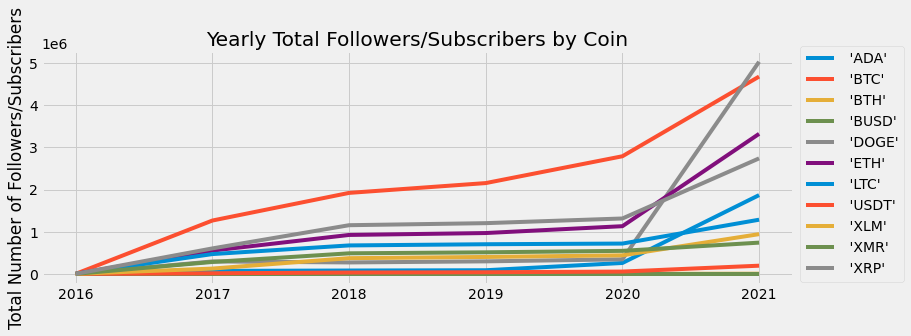

In [128]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
# Import the style from Matplotlib.
from matplotlib import style
import matplotlib.pyplot as plt

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

import numpy as np
ax = year_flat.plot(xticks=year_flat.index, figsize=(12,4))

# Set the x and y label
ylab = ax.set_ylabel('Total Number of Followers/Subscribers')
ax.set_xlabel(None)
ax.legend(bbox_to_anchor=(1.0, 1.05))
# Create a title. 
ax.set_title("Yearly Total Followers/Subscribers by Coin")

# Save Figure
plt.savefig("Analysis/Yearly_Coinwise_Social_Media_Followers_Subscribers.png")

plt.show()

In [63]:
# # 2. Using groupby() to create a new DataFrame showing the sum of the followers
# #  for each date where the indices are the city type and date.
# datewise_follower_total_df = Followers_df.groupby(["Coin_Symbol","Datetime"]).sum()["Total_Followers_Subscribers"]
# datewise_follower_total_df

Coin_Symbol  Datetime  
ADA          2016-08-05          0
             2016-08-07          0
             2016-08-09          0
             2016-08-11          0
             2016-08-13          0
                            ...   
XRP          2022-01-18    2782484
             2022-01-20    2787155
             2022-01-22    2790993
             2022-01-24    2794544
             2022-01-26    2800967
Name: Total_Followers_Subscribers, Length: 11011, dtype: int64

In [64]:
datewise_follower_total_df = datewise_follower_total_df.reset_index()
datewise_follower_total_df

,Coin_Symbol,Datetime,Total_Followers_Subscribers
0,ADA,2016-08-05,0
1,ADA,2016-08-07,0
2,ADA,2016-08-09,0
3,ADA,2016-08-11,0
4,ADA,2016-08-13,0
...,...,...,...
11006,XRP,2022-01-18,2782484
11007,XRP,2022-01-20,2787155
11008,XRP,2022-01-22,2790993
11009,XRP,2022-01-24,2794544


In [65]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# Followers_df = Followers_df.drop(['level_0', 'index'], axis=1)
Followers_df = Followers_df.reset_index()
Followers_df

,level_0,Unnamed: 0,index,Unnamed: 0.1,Coin_Symbol,Datetime,Cryptocompare_followers,Fb_followers,Twitter_followers,Reddit_subscribers,Code_Repo_Subscribers,Total_Followers_Subscribers
0,0,0,0,0,BTH,2016-08-05,0,0,0,0,0,0
1,1,1,1,1,BTH,2016-08-07,0,0,0,0,0,0
2,2,2,2,2,BTH,2016-08-09,0,0,0,0,0,0
3,3,3,3,3,BTH,2016-08-11,0,0,0,0,0,0
4,4,4,4,4,BTH,2016-08-13,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11006,11006,11006,11006,11006,DOGE,2022-01-18,18291,63,2887256,2260882,861,5167353
11007,11007,11007,11007,11007,DOGE,2022-01-20,18303,63,2902233,2261906,861,5183366
11008,11008,11008,11008,11008,DOGE,2022-01-22,18306,63,2912560,2262813,861,5194603
11009,11009,11009,11009,11009,DOGE,2022-01-24,18312,63,2922496,2263703,861,5205435


In [66]:
# 4. Create a pivot table with the 'Datetime' as the index, the columns ='Coin_Symbol', and values='Total_Followers_Subscribers' 
# to get the Total_Followers_Subscribers for each coin by the date. 
pivot1_table_df = pd.pivot_table(Followers_df, index='Datetime', columns='Coin_Symbol', values='Total_Followers_Subscribers', aggfunc=[sum])
pivot1_table_df

sum                                                         \
Coin_Symbol      ADA      BTC   BTH BUSD     DOGE      ETH      LTC    USDT   
Datetime                                                                      
2016-08-05         0        0     0    0        0        0        0       0   
2016-08-07         0        0     0    0        0        0        0       0   
2016-08-09         0        0     0    0        0        0        0       0   
2016-08-11         0        0     0    0        0        0        0       0   
2016-08-13         0        0     0    0        0        0        0       0   
...              ...      ...   ...  ...      ...      ...      ...     ...   
2022-01-18   1924251  4752936  3320    5  5167353  3422235  1304230  199996   
2022-01-20   1925291  4760840  3320    5  5183366  3435637  1306349  201042   
2022-01-22   1926047  4769681  3320    5  5194603  3447971  1308265  202681   
2022-01-24   1926825  4778159  3320    5  5205435  3457623  1310112  203895   
2022-01-26   1927660  4790248  3320    6  5233814  3471808  1313150  204620   

                                      
Coin_Symbol     XLM     XMR      XRP  
Datetime                              
2016-08-05        0       0        0  
2016-08-07        0       0        0  
2016-08-09        0       0        0  
2016-08-11        0       0        0  
2016-08-13        0       0        0  
...             ...     ...      ...  
2022-01-18   952754  745402  2782484  
2022-01-20   954802  745812  2787155  
2022-01-22   956480  746151  2790993  
2022-01-24   957761  746670  2794544  
2022-01-26   959787  747253  2800967  

[1001 rows x 11 columns]

In [87]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
pivot1_table_df.index = pd.to_datetime(pivot1_table_df.index)

In [88]:
# 7. Check that the datatype for the index is datetime using df.info()
pivot1_table_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1001 entries, 2016-08-05 to 2022-01-26
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   (sum, ADA)   1001 non-null   int64
 1   (sum, BTC)   1001 non-null   int64
 2   (sum, BTH)   1001 non-null   int64
 3   (sum, BUSD)  1001 non-null   int64
 4   (sum, DOGE)  1001 non-null   int64
 5   (sum, ETH)   1001 non-null   int64
 6   (sum, LTC)   1001 non-null   int64
 7   (sum, USDT)  1001 non-null   int64
 8   (sum, XLM)   1001 non-null   int64
 9   (sum, XMR)   1001 non-null   int64
 10  (sum, XRP)   1001 non-null   int64
dtypes: int64(11)
memory usage: 93.8 KB


In [89]:
flattened = pd.DataFrame(pivot1_table_df.to_records())
flattened

,Datetime,"('sum', 'ADA')","('sum', 'BTC')","('sum', 'BTH')","('sum', 'BUSD')","('sum', 'DOGE')","('sum', 'ETH')","('sum', 'LTC')","('sum', 'USDT')","('sum', 'XLM')","('sum', 'XMR')","('sum', 'XRP')"
0,2016-08-05,0,0,0,0,0,0,0,0,0,0,0
1,2016-08-07,0,0,0,0,0,0,0,0,0,0,0
2,2016-08-09,0,0,0,0,0,0,0,0,0,0,0
3,2016-08-11,0,0,0,0,0,0,0,0,0,0,0
4,2016-08-13,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
996,2022-01-18,1924251,4752936,3320,5,5167353,3422235,1304230,199996,952754,745402,2782484
997,2022-01-20,1925291,4760840,3320,5,5183366,3435637,1306349,201042,954802,745812,2787155
998,2022-01-22,1926047,4769681,3320,5,5194603,3447971,1308265,202681,956480,746151,2790993
999,2022-01-24,1926825,4778159,3320,5,5205435,3457623,1310112,203895,957761,746670,2794544


In [90]:
flattened.columns = [hdr.replace("('sum', ", " ").replace(")", "") \
                     for hdr in flattened.columns]
flattened.columns = [hdr.replace("('', ", " ").replace(")", "") \
                     for hdr in flattened.columns]

In [91]:
flattened

,Datetime,'ADA','BTC','BTH','BUSD','DOGE','ETH','LTC','USDT','XLM','XMR','XRP'
0,2016-08-05,0,0,0,0,0,0,0,0,0,0,0
1,2016-08-07,0,0,0,0,0,0,0,0,0,0,0
2,2016-08-09,0,0,0,0,0,0,0,0,0,0,0
3,2016-08-11,0,0,0,0,0,0,0,0,0,0,0
4,2016-08-13,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
996,2022-01-18,1924251,4752936,3320,5,5167353,3422235,1304230,199996,952754,745402,2782484
997,2022-01-20,1925291,4760840,3320,5,5183366,3435637,1306349,201042,954802,745812,2787155
998,2022-01-22,1926047,4769681,3320,5,5194603,3447971,1308265,202681,956480,746151,2790993
999,2022-01-24,1926825,4778159,3320,5,5205435,3457623,1310112,203895,957761,746670,2794544


In [92]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
flattened.Datetime = pd.to_datetime(flattened.Datetime)
flattened

,Datetime,'ADA','BTC','BTH','BUSD','DOGE','ETH','LTC','USDT','XLM','XMR','XRP'
0,2016-08-05,0,0,0,0,0,0,0,0,0,0,0
1,2016-08-07,0,0,0,0,0,0,0,0,0,0,0
2,2016-08-09,0,0,0,0,0,0,0,0,0,0,0
3,2016-08-11,0,0,0,0,0,0,0,0,0,0,0
4,2016-08-13,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
996,2022-01-18,1924251,4752936,3320,5,5167353,3422235,1304230,199996,952754,745402,2782484
997,2022-01-20,1925291,4760840,3320,5,5183366,3435637,1306349,201042,954802,745812,2787155
998,2022-01-22,1926047,4769681,3320,5,5194603,3447971,1308265,202681,956480,746151,2790993
999,2022-01-24,1926825,4778159,3320,5,5205435,3457623,1310112,203895,957761,746670,2794544


In [97]:
flattened

,Datetime,'ADA','BTC','BTH','BUSD','DOGE','ETH','LTC','USDT','XLM','XMR','XRP'
0,2016-08-05,0,0,0,0,0,0,0,0,0,0,0
1,2016-08-07,0,0,0,0,0,0,0,0,0,0,0
2,2016-08-09,0,0,0,0,0,0,0,0,0,0,0
3,2016-08-11,0,0,0,0,0,0,0,0,0,0,0
4,2016-08-13,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
996,2022-01-18,1924251,4752936,3320,5,5167353,3422235,1304230,199996,952754,745402,2782484
997,2022-01-20,1925291,4760840,3320,5,5183366,3435637,1306349,201042,954802,745812,2787155
998,2022-01-22,1926047,4769681,3320,5,5194603,3447971,1308265,202681,956480,746151,2790993
999,2022-01-24,1926825,4778159,3320,5,5205435,3457623,1310112,203895,957761,746670,2794544


In [96]:
year_follower_df = flattened['Datetime'][flattened['Datetime'].isin(['2016-12-31', '2017-12-31','2018-12-31','2019-12-31','2020-12-31','2021-12-31'])]
year_follower_df

74    2016-12-31
439   2018-12-31
987   2021-12-31
Name: Datetime, dtype: datetime64[ns]

In [61]:
Final_table = pivot1_table_df.reset_index()
Final_table

Datetime      sum                                        \
Coin_Symbol                 ADA      BTC   BTH BUSD     DOGE      ETH   
0           2016-08-05        0        0     0    0        0        0   
1           2016-08-07        0        0     0    0        0        0   
2           2016-08-09        0        0     0    0        0        0   
3           2016-08-11        0        0     0    0        0        0   
4           2016-08-13        0        0     0    0        0        0   
...                ...      ...      ...   ...  ...      ...      ...   
996         2022-01-18  1924251  4752936  3320    5  5167353  3422235   
997         2022-01-20  1925291  4760840  3320    5  5183366  3435637   
998         2022-01-22  1926047  4769681  3320    5  5194603  3447971   
999         2022-01-24  1926825  4778159  3320    5  5205435  3457623   
1000        2022-01-26  1927660  4790248  3320    6  5233814  3471808   

                                                       
Coin_Symbol      LTC    USDT     XLM     XMR      XRP  
0                  0       0       0       0        0  
1                  0       0       0       0        0  
2                  0       0       0       0        0  
3                  0       0       0       0        0  
4                  0       0       0       0        0  
...              ...     ...     ...     ...      ...  
996          1304230  199996  952754  745402  2782484  
997          1306349  201042  954802  745812  2787155  
998          1308265  202681  956480  746151  2790993  
999          1310112  203895  957761  746670  2794544  
1000         1313150  204620  959787  747253  2800967  

[1001 rows x 12 columns]

In [40]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
Total_Followers_Subscribers_week_df = pivot1_table_df.resample('w').sum()
Total_Followers_Subscribers_week_df

sum                                                     \
Coin_Symbol      ADA       BTC    BTH BUSD      DOGE       ETH      LTC   
Datetime                                                                  
2016-08-07         0         0      0    0         0         0        0   
2016-08-14         0         0      0    0         0         0        0   
2016-08-21         0         0      0    0         0         0        0   
2016-08-28         0         0      0    0         0         0        0   
2016-09-04         0         0      0    0         0         0        0   
...              ...       ...    ...  ...       ...       ...      ...   
2022-01-02   7467509  18700661  13276   20  20099839  13265256  5132356   
2022-01-09   5608666  14112301   9958   15  15205451  10061530  3866778   
2022-01-16   7587482  18932815  13280   20  20483639  13568391  5188490   
2022-01-23   5775589  14283457   9960   15  15545322  10305843  3918844   
2022-01-30   3854485   9568407   6640   11  10439249   6929431  2623262   

                                                 
Coin_Symbol    USDT      XLM      XMR       XRP  
Datetime                                         
2016-08-07        0        0        0         0  
2016-08-14        0        0        0         0  
2016-08-21        0        0        0         0  
2016-08-28        0        0        0         0  
2016-09-04        0        0        0         0  
...             ...      ...      ...       ...  
2022-01-02   771377  3764831  2959386  10947193  
2022-01-09   586753  2835258  2226754   8254285  
2022-01-16   793743  3795617  2976270  11074285  
2022-01-23   603719  2864036  2237365   8360632  
2022-01-30   408515  1917548  1493923   5595511  

[287 rows x 11 columns]

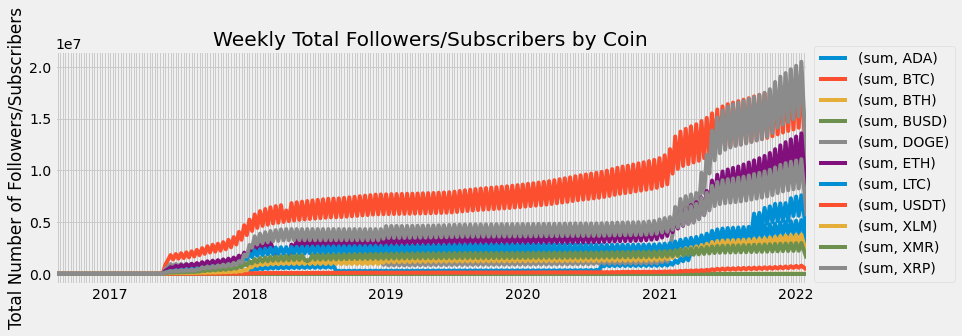

In [94]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
# Import the style from Matplotlib.
from matplotlib import style
import matplotlib.pyplot as plt

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

import numpy as np
ax = Total_Followers_Subscribers_week_df.plot(xticks=Total_Followers_Subscribers_week_df.index, figsize=(12,4))

# Set the x and y label
ylab = ax.set_ylabel('Total Number of Followers/Subscribers')
ax.set_xlabel(None)
ax.legend(bbox_to_anchor=(1.0, 1.05))
# Create a title. 
ax.set_title("Weekly Total Followers/Subscribers by Coin")

# Save Figure
plt.savefig("analysis/Weekly_Coinwise_Social_Media_Followers_Subscribers.png")


plt.show()

In [42]:
# 8. Create a new DataFrame using the "resample()" function by month 'm' and get the sum of the fares for each week.
Total_Followers_Subscribers_month_df = pivot1_table_df.resample('m').sum()
Total_Followers_Subscribers_month_df

sum                                                      \
Coin_Symbol       ADA       BTC    BTH BUSD      DOGE       ETH       LTC   
Datetime                                                                    
2016-08-31          0         0      0    0         0         0         0   
2016-09-30          0         0      0    0         0         0         0   
2016-10-31          0         0      0    0         0         0         0   
2016-11-30          0         0      0    0         0         0         0   
2016-12-31          0         0      0    0         0         0         0   
...               ...       ...    ...  ...       ...       ...       ...   
2021-09-30   21933712  64540911    105   75  64373305  41486117  17330841   
2021-10-31   24210438  65821637    105   75  66511028  43408274  17787585   
2021-11-30   25459753  67607169  19981   75  70949014  46222043  18481821   
2021-12-31   28746093  74004369  53114   80  78982048  51967570  20334686   
2022-01-31   24694139  61583584  43157   66  66715536  44196523  16882735   

                                                    
Coin_Symbol     USDT       XLM       XMR       XRP  
Datetime                                            
2016-08-31         0         0         0         0  
2016-09-30         0         0         0         0  
2016-10-31         0         0         0         0  
2016-11-30         0         0         0         0  
2016-12-31         0         0         0         0  
...              ...       ...       ...       ...  
2021-09-30   2282797  12707061  10565245  36358021  
2021-10-31   2401834  13064120  10711112  37495529  
2021-11-30   2570670  13618379  10896772  39229289  
2021-12-31   2969159  14930201  11779136  43299250  
2022-01-31   2586758  12355207   9674978  36027176  

[66 rows x 11 columns]

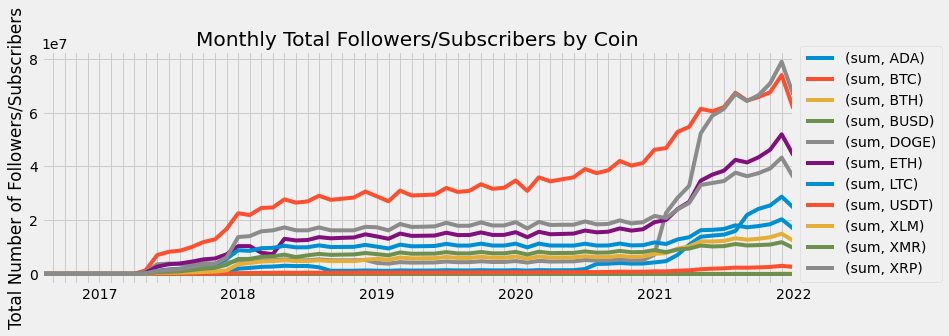

In [43]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
# Import the style from Matplotlib.
from matplotlib import style
import matplotlib.pyplot as plt

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

import numpy as np
ax = Total_Followers_Subscribers_month_df.plot(xticks=Total_Followers_Subscribers_month_df.index, figsize=(12,4))

# Set the x and y label
ylab = ax.set_ylabel('Total Number of Followers/Subscribers')
ax.set_xlabel(None)
# Create a title.
ax.legend(bbox_to_anchor=(1.0, 1.05))
ax.set_title("Monthly Total Followers/Subscribers by Coin")

# Save Figure
plt.savefig("analysis/Monthly_Coinwise_Social_Media_Followers_Subscribers.png")


plt.show()

In [45]:
# 8. Create a new DataFrame using the "resample()" function by month 'y' and get the sum of the fares for each week.
Total_Followers_Subscribers_year_df = pivot1_table_df.resample('y').sum()

Total_Followers_Subscribers_year_df

sum                                               \
Coin_Symbol        ADA        BTC    BTH BUSD       DOGE        ETH   
Datetime                                                              
2016-12-31           0          0      0    0          0          0   
2017-12-31      326406   76586701      0    0   27340643   33516631   
2018-12-31    25395666  318606840      0    0   60786782  142472675   
2019-12-31    15060066  365419940    531  193   51630809  173186192   
2020-12-31    28871971  445910487    927  478   58019689  186295721   
2021-12-31   185863516  724115755  74106  883  611469207  425830097   
2022-12-31    24694139   61583584  43157   66   66715536   44196523   

                                                                   
Coin_Symbol        LTC      USDT        XLM        XMR        XRP  
Datetime                                                           
2016-12-31           0         0          0          0          0  
2017-12-31    19807942    369406    4491527   11311255   20344021  
2018-12-31   118217711   4731215   56009848   80833710  192927430  
2019-12-31   125929245   6261215   70777439   91455751  214802740  
2020-12-31   128787158   8036270   75301484   95772617  224692573  
2021-12-31   190624983  22551263  138657950  121509016  388334523  
2022-12-31    16882735   2586758   12355207    9674978   36027176

13    2016-08-31
439   2018-12-31
987   2021-12-31
Name: Datetime, dtype: datetime64[ns]

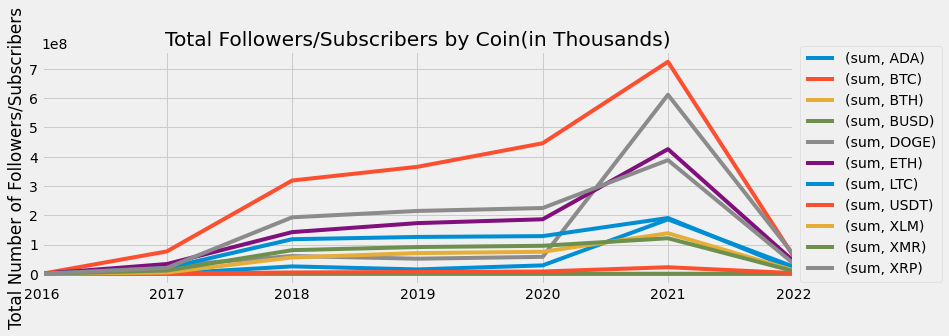

In [136]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
# Import the style from Matplotlib.
from matplotlib import style
import matplotlib.pyplot as plt

# Use the graph style fivethirtyeight.
# style.use('fivethirtyeight')

import numpy as np
ax = Total_Followers_Subscribers_year_df.plot(xticks=Total_Followers_Subscribers_year_df.index, figsize=(12,4))

# Set the x and y label
ylab = ax.set_ylabel('Total Number of Followers/Subscribers')
ax.set_xlabel(None)
# Create a title.
ax.legend(bbox_to_anchor=(1.0, 1.05))
ax.set_title("Total Followers/Subscribers by Coin(in Thousands)")
# plt.legend(loc='center', title='type')

# Save Figure
plt.savefig("analysis/Yearly_Coinwise_Social_Media_Followers_Subscribers.png")

plt.show()

In [129]:
pie_df = year_flat.filter(items = [2021], axis=0)
pie_df

,'ADA','BTC','BTH','BUSD','DOGE','ETH','LTC','USDT','XLM','XMR','XRP'
Year,,,,,,,,,,,
2021,1867226,4679046,3319,5,5030143,3320799,1283820,193224,941425,740134,2738437


In [149]:
pie_df.columns = ['ADA', 'BTC', 'BTH', 'BUSD', 'DOGE', 'ETH', 'LTC', 'USDT', 'XLM', 'XMR', 'XRP']
pie_df

,ADA,BTC,BTH,BUSD,DOGE,ETH,LTC,USDT,XLM,XMR,XRP
Year,,,,,,,,,,,
2021,1867226,4679046,3319,5,5030143,3320799,1283820,193224,941425,740134,2738437


In [150]:
pie_df['Other'] = pie_df['BTH']+pie_df['BUSD'] 
pie_df = pie_df.drop(columns=['BTH', 'BUSD'])
pie_df

,ADA,BTC,DOGE,ETH,LTC,USDT,XLM,XMR,XRP,Other
Year,,,,,,,,,,
2021,1867226,4679046,5030143,3320799,1283820,193224,941425,740134,2738437,3324


In [151]:
# Set the x-axis to a list of strings for each month.
x_axis = pie_df.columns

# Set the y-axis to a list of floats as the total fare in US dollars accumulated for each month.
y_axis = pie_df.iloc[0]

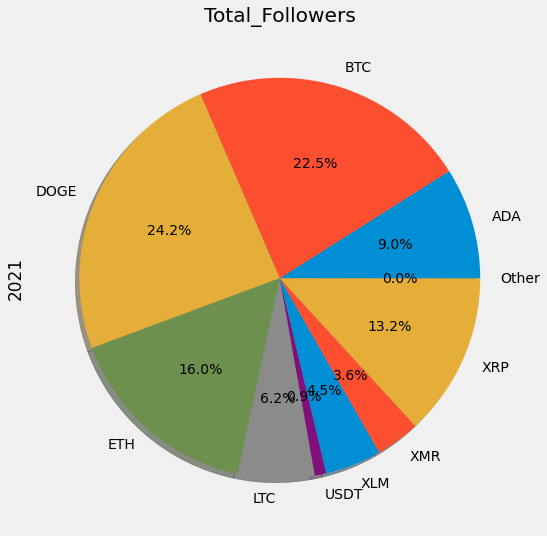

In [152]:
plot = pie_df.iloc[0].plot.pie(title="Total_Followers", legend=False, \
                   autopct='%1.1f%%', \
                   shadow=True, startangle=0, figsize=(8, 15))


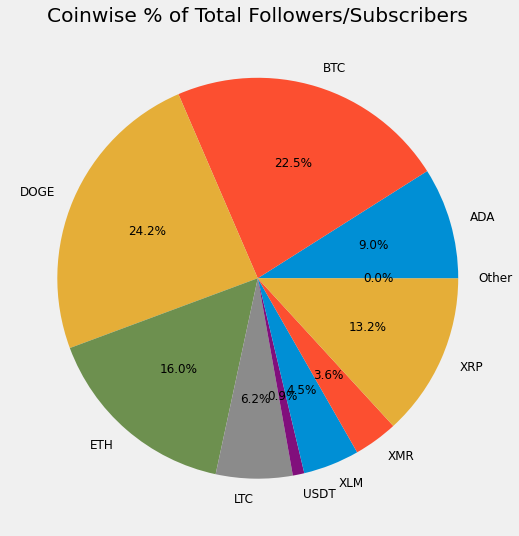

In [156]:
# fig, ax = plt.subplots()
# ax.pie(y_axis,labels=x_axis)
# explode_values = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.subplots(figsize=(8, 15))
plt.pie(y_axis, labels=x_axis, autopct='%.1f%%', textprops={'fontsize':12})
plt.title("Coinwise % of Total Followers/Subscribers")

# Save Figure
plt.savefig("Analysis/Coinwise_Percentage_Social_Media_Followers_Subscribers.png")

plt.show()